In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import pandas as pd
import scipy

import os
from datetime import datetime
from datetime import timedelta
import glob
from skimage import io, filters

from tqdm import tqdm

from IPython.display import Image

# Propagating Mode-1 Internal Waves Along a Channel

### James Munroe and Manuel Caballero 

#### October 13-14, 2016

## Introduction

Internal gravity waves propagate in a density stratified fluids.  In this lab scale experiment, we measure the phase speed and amplitude of three vertically trapped, mode-1 internal waves in a linear stratified fluid as the waves propagate within a tank.

## Procedure

The tank is filled with linearly stratified salt water using the modified double bucket apparatus. The density profile is measured with a conductivity probe.  Waves are generated with mode-1 wave generator.  The waves were required with a digital video camera and analyzed using digital synthetic schlieren.

- October 13, 2016
    - Filled the tank
- October 14, 2016
    - Calibrated the conductivity probe
    - Measured the stratification
    - Trial A: Wave maker set to a rotation rate of 800 rpm
    - Trial B: Wave maker set to a rotation rate of 600 rpm
    - Trial C: Wave maker set to a rotation rate of 400 rpm
    - Measured the stratification

## Results

### Tank filling

The tank was filled with the program

`python tank_fill.py`

and it took 180 minutes.  The tank was filled to a depth of 

In [6]:
H = 52 # cm

### Conductivity Probe Calibration

The conductivity was calibrated with the following data:

    sample  density temperature(C) water (mL) salt (gr) probe measurements 
    #1      1.0315  22.3           145        8         2016-10-14 14:12:50.921150 -0.915168
                                                        2016-10-14 14:12:52.916419 -0.915168
                                                        2016-10-14 14:12:54.806672 -0.915168
                                                        2016-10-14 14:12:56.696733 -0.925216
                                                        2016-10-14 14:12:58.692781 -0.940288
                                                        2016-10-14 14:13:00.688460 -0.940288
                                                        2016-10-14 14:13:02.053704 -0.940288
                                                        2016-10-14 14:13:04.680105 -0.940288
                                                        2016-10-14 14:13:06.885541 -0.950336
                                                        2016-10-14 14:13:08.356300 -0.960384

    #2      1.0238  22.9           150        4         2016-10-14 14:28:10.873700 0.345856
                                                        2016-10-14 14:28:12.344588 0.355904
                                                        2016-10-14 14:28:14.445551 0.35088
                                                        2016-10-14 14:28:16.336319 0.406144
                                                        2016-10-14 14:28:18.542538 0.406144
                                                        2016-10-14 14:28:20.537759 0.406144
                                                        2016-10-14 14:28:22.428586 0.40112
                                                        2016-10-14 14:28:24.739298 0.40112
                                                        2016-10-14 14:28:26.630370 0.396096
                                                        2016-10-14 14:28:28.731446 0.396096
                                                   
    #3      1.0087  23.1           160        3         2016-10-14 14:38:44.502343 2.757376
                                                        2016-10-14 14:38:46.413410 2.827712
                                                        2016-10-14 14:38:48.657508 2.993504
                                                        2016-10-14 14:38:50.767593 3.008576
                                                        2016-10-14 14:38:52.566113 3.018624
                                                        2016-10-14 14:38:54.587724 3.028672
                                                        2016-10-14 14:38:56.592030 3.028672
                                                        2016-10-14 14:38:58.512474 3.033696
                                                        2016-10-14 14:39:00.730708 3.033696
                                                        2016-10-14 14:39:02.448984 3.028672

The data was generated with the

`python sample.py`

command. Different samples were prepared by adding the recorded amount of salt to the recorded amount of water.  The density of each sample was measured using an Anton Paar density meter. 

The calibration data used is the last measured voltage drop for each salt water sample of different density.

In [7]:
calibration_data = [ [1.0315, -0.960384],
                     [1.0238, 0.396096],
                     [1.0087, 3.028672] ]

### Density Profile

Conductivity measurements were made with the command

`python move_and_sample.py 50 > <filename>`

The conductivity probe was used to take two profiles:
    - sample_201610141448.csv
    - afterprofile_201610141606.csv


Each profile file was hand-edited to be to conform to a CSV file.  Each file has the following structure:

    date,time,steps,depth,voltage
    2016-10-13,16:13:08.189549,20655,10.3275,4.782048
    2016-10-13,16:13:08.296372,20656,10.328,4.812192
    2016-10-13,16:13:08.403504,20676,10.338,4.782048
    2016-10-13,16:13:08.510635,20719,10.3595,4.817216

In [8]:
profile1 = pd.read_csv('/home/evankielley/research/wavetank/profiles/sample_201610141448.csv')
profile2 = pd.read_csv('/home/evankielley/research/wavetank/profiles/afterprofile_201610141606.csv')

profiles = pd.concat((profile1, profile2))

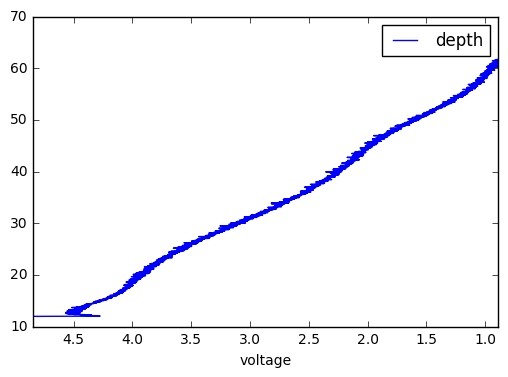

In [9]:
profile1.plot(x='voltage', y='depth', kind='line')

### Videos

Digital video was recorded in 30 second segments at 10 frames per second.  Each frame was labelled 
    
    1.jpg
    ...
    299.jpg

within a segment

Files are stored in

In [10]:
dvpath = '/home/evankielley/research/wavetank'

and the subdirectories are

In [11]:
dvfiles = ['dv_20161014154210','dv_20161014154241','dv_20161014154312',
            'dv_20161014154343','dv_20161014154413','dv_20161014154445',
            
            'dv_20161014154515','dv_20161014154546','dv_20161014155419',
            'dv_20161014155450','dv_20161014155521','dv_20161014155552',
            'dv_20161014155623','dv_20161014155654',
            
            'dv_20161014160132','dv_20161014160203','dv_20161014160234',
            'dv_20161014160305','dv_20161014160336','dv_20161014160407',
           ]

where the videos have been grouped by experiment. All frames look like the image below:

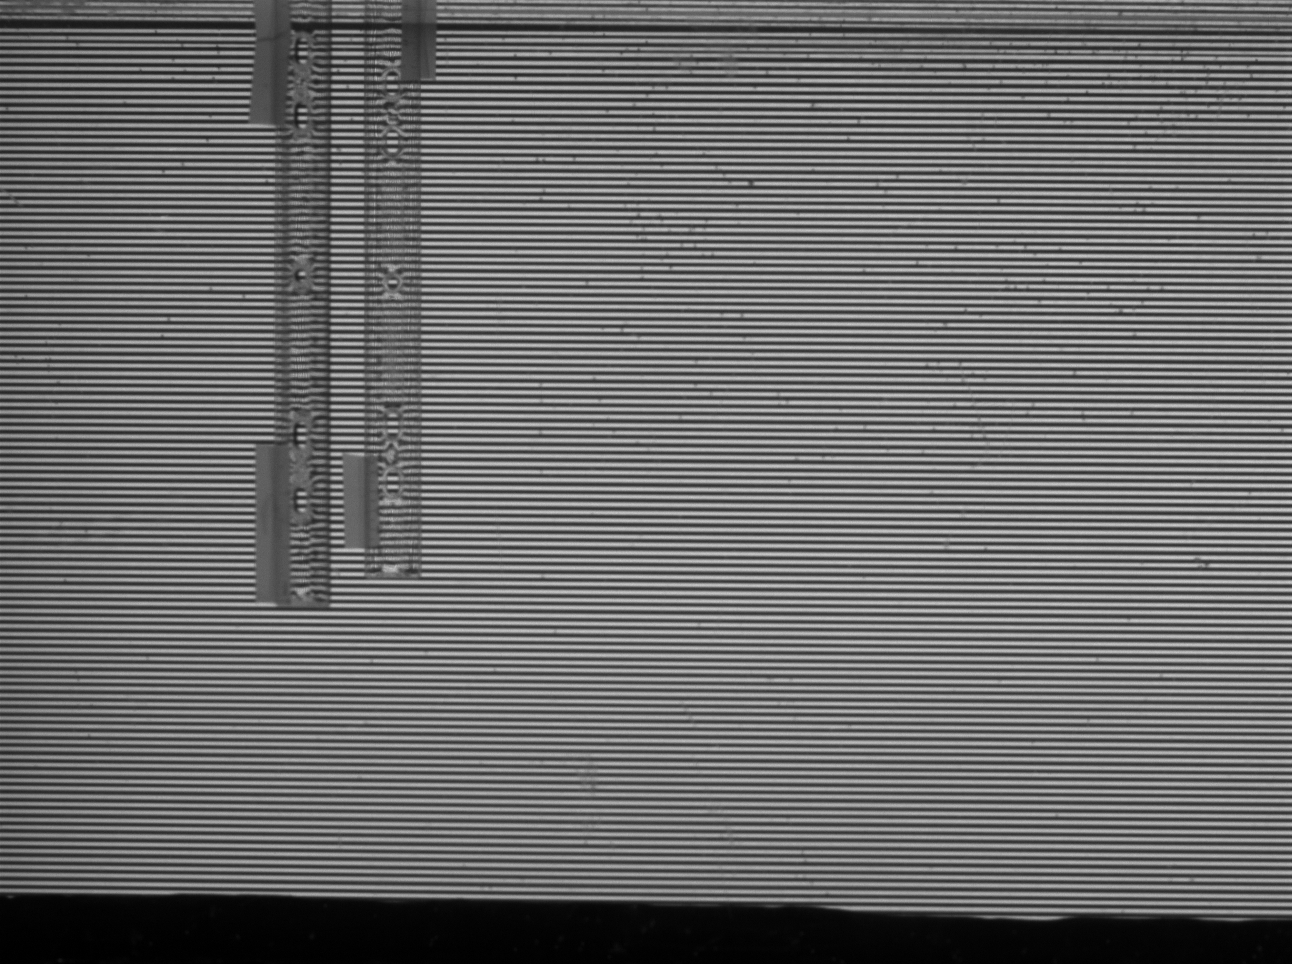

In [12]:
filename = "/home/evankielley/research/wavetank/dv_20161014154210/1.jpg"
Image(filename, width=600)

We can group the frames into movies according to experiment. We should be able to map time to image frame.

In [13]:
images = []
times = []

# make a list of all frames available for analysis
for dvfile in dvfiles:
    dvfiledir = os.path.join(dvpath, dvfile)
    
    # find timestamp of bundle
    timestamp = dvfile.split('_')[1]
    timestamp = datetime.strptime(timestamp, '%Y%m%d%H%M%S')
    
    # get list of all image files
    imagefiles = glob.glob(os.path.join(dvfiledir,'*.jpg'))
    for imagefile in imagefiles:
        basename = os.path.basename(imagefile)
        n = int(basename.split('.')[0])
        dt = timedelta(seconds=(n-1)/10)
        t = timestamp + dt
        
        times.append(t)
        images.append(imagefile)
        
frames = pd.Series(images, index=times).reindex(index=sorted(times))

In [14]:
frames[340]

'/home/evankielley/research/wavetank/dv_20161014154241/42.jpg'

In [15]:
frames.index[300]

Timestamp('2016-10-14 15:42:41.100000')

## Analysis

[0, 1292, 964, 0]

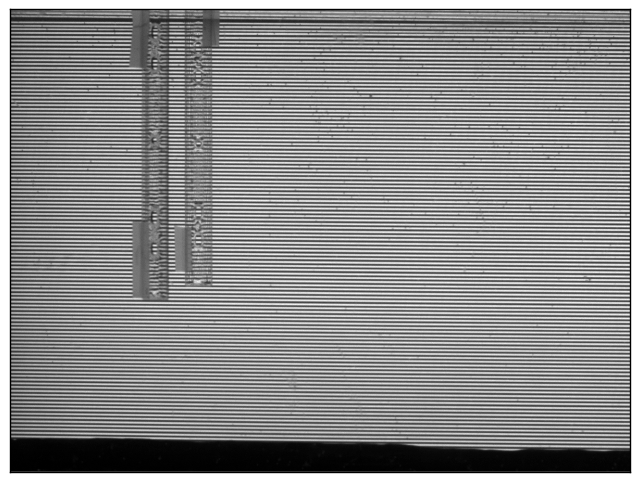

In [16]:
img = io.imread(frames[0])
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
plt.gray()
ax.imshow(img)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

### Synthetic Schlieren

Local changes in density due to the passing of internal gravity waves cause changes in the index of refraction.  These index of refraction changes are observed as vertical perturbations of the image in time.

### Qualitative Synthetic Schlieren

The simplest approach is to subtract a reference image from the current image.

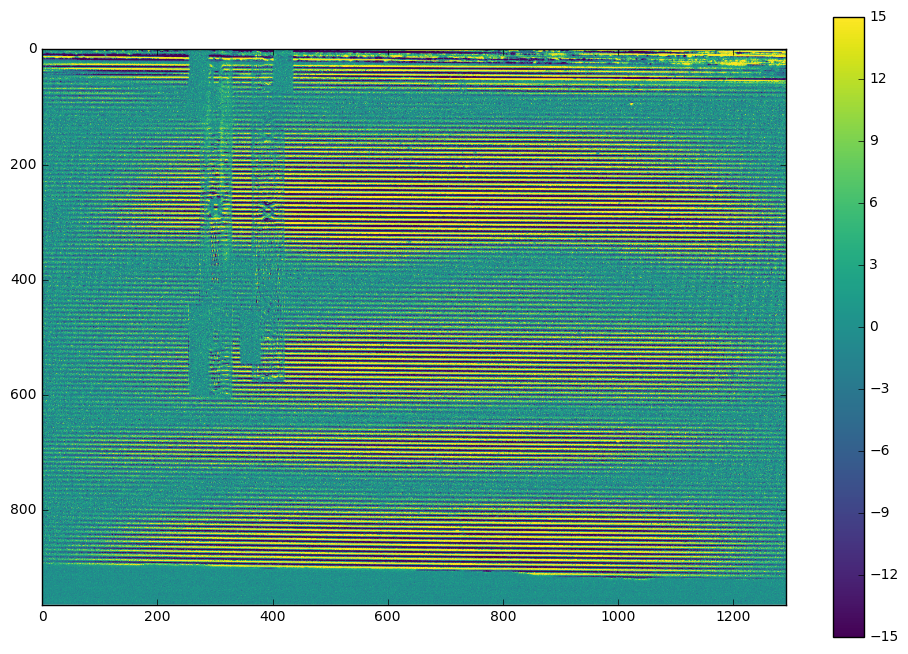

In [17]:
ref_img = io.imread(frames[1000])*1.0
img = io.imread(frames[2005])
diff = img - ref_img

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

m = ax.imshow(diff,
             cmap=plt.get_cmap('viridis'),
             clim = [-15, 15])
#ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
cb = fig.colorbar(m)

In [18]:
from matplotlib import animation, rc
from IPython.display import HTML

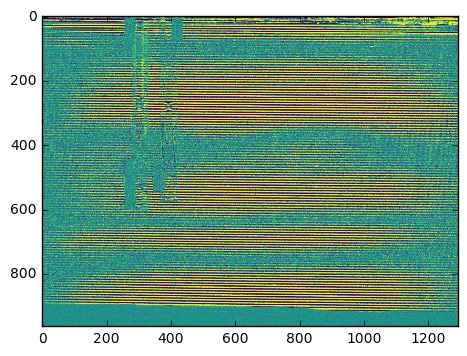

In [19]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

#ax.set_xlim(( 0, 1284))
#ax.set_ylim((0, 984))
ax.invert_yaxis()
im = ax.imshow(diff,
             cmap=plt.get_cmap('viridis'),
             clim = [-10, 10])


In [20]:
# initialization function: plot the background of each frame
def init():
    im.set_array(ref_img)
    return (im,)

In [21]:
# animation function. This is called sequentially
def animate(i):
    ref_img = io.imread(frames[1500])
    img = io.imread(frames[2000+i])
    diff = img - ref_img
    im.set_array(diff)
    return (im,)

In [22]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=30, blit=True)

In [23]:
HTML(anim.to_html5_video())

In [ ]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [ ]:
anim

## Quantitative Schlieren

In [275]:
def schlieren(img1_filename, img2_filename, 
              window = None,
              **kwargs):
    """
    Apply Synthetic Schlieren algorithm for a pair of images (8bit, grayscale)
    """
    
    image1 = io.imread(img1_filename)
    image2 = io.imread(img2_filename)
    
    if window is not None:
        image1 = image1[window]
        image2 = image2[window]
        
    dz = schlieren_lines(image1, image2, **kwargs)

    return dz

In [276]:
def schlieren_lines(image1, image2, 
                    clip_large_values = True,
                    sigma = 0.3,
                    apply_mintol = True,
                    apply_mean_filter = True,
                    apply_gaussian_filter = True,
                    **kwargs):
    
    """
    Apply Synthetic Schlieren algorithm for a pair of images (8bit, grayscale)
        takes two arrays as input
    
    Assumes background image is horizontal dark and light lines.
    
    returns array
    """

    # step 1: calculate the vertical displacement dz in pixel coordinates
    dz = compute_deltaz(image1, image2)

    if apply_mintol:
        # step 2: find a mask of the pixels of the image that are monotonically increasing
        C = getTol(image1)
    
        # step 3: convert the nan's  into 0's and multiply the array with the getTol mask to select
        # the pixels that are relevant
        dz = np.nan_to_num(dz) * C

    # step 4: clip the large values
    if clip_large_values:
        min_max = 0.03
        clip_min_max = 0.95 * min_max
        dz[dz > clip_min_max] = clip_min_max
        dz[dz < -clip_min_max] = -clip_min_max
    
    if apply_mean_filter:
        # Step 5 : map the original data from -0.1 to +0.1 to range from 0 to 255
        mapped_dz = np.uint8((dz + min_max)/ (2.0 * min_max) * 256)

        # Implementing the skimage.filter.mean so as to apply mean filter on a
        # masked array and then applying a gaussian filter to smooth the image

        # step 6: prepare a mask:: Mask value 1: use the data and 0: ignore the data here within the disk
        mask_dz = np.uint8(mapped_dz !=128)

        #Step 7 : apply the mean filter to compute values for the masked pixels
        # Apply the filter in Z not in X.
        disk_size = 10
        row_disk = np.ones((disk_size,1))
        filt_dz = filters.rank.mean(mapped_dz,
                #skimage.morphology.disk(disk_size),
                row_disk,
                mask = mask_dz,
                )

        # Step 8: setting the zeros in the filt_delz to 128
        filt_dz[filt_dz ==0] = 128

        # Step 9: mapping back the values from 0 to 255 to its original values of
        # -0.1 to 0.1
        filtered_dz = (filt_dz / 256.0) * (2.0 * min_max) - min_max

    # Step 10: Replacing the elements that were already right in the beginning
        dz = (1-mask_dz) * filtered_dz + mask_dz * dz

    if apply_gaussian_filter:
        # Step 11 : applying the Gaussian filter to do a spatial smoothing of the image
        # apply the gaussian smoothing along Z
        dz = filters.gaussian(dz, sigma, 1)

    return dz

In [282]:
def getTol(image, mintol = 10):
    """
    estimate monotonicity of data
    
    returns a mask array
    """

    nrows, ncols = image.shape
    #nrows, ncols = 60, 60

    
    # work with float point arrays
    image = image.astype(np.float32)

    # compute diference between rows
    d = image[:-1,:] - image[1:,:]
    z = np.zeros(ncols)
    # construct array of difference between current and upper
    A = np.vstack((d, z))
    # and between current and lower row
    B = np.vstack((z, d))
    # only estimate if the sequence is monotonic and 
    # differences are at least mintol 
    C = (abs(A) >= mintol) & (abs(B) >= mintol) & (A*B>0)
    
    return C

In [278]:
def compute_dz(im1, im2):
    """
    Estimate dz in pixel coordinates between two given two images im1 and im2 (im1 is the reference image)
    """

    # make sure images are float
    im1 = im1.astype(np.float32)
    im2 = im2.astype(np.float32)

    # assert img1.shape = img2.shape
    N, M = im1.shape
    zerorow = np.zeros(M)

    A = im2[:,:] - im1[:,:]
    #   0,1,2,N-1   0,1,2,3, N-1

    B = im2[:-1,:] - im1[1:,:]
    B = np.vstack((B, zerorow))

    #     1,2,3,..N-1   -   0,1,2,..N-2
    C = im2[1:,:] - im1[:-1,:]
    C = np.vstack((zerorow, C))

    D = im1[:-1,:] - im1[1:,:]
    D = np.vstack((zerorow, D))

    E = im1[:-2,:] - im1[2:,:]
    E = np.vstack((zerorow, E, zerorow))

    F = im1[1:,:] - im1[:-1,:]
    F = np.vstack((F, zerorow))

    ans = - A/E * (B/D + C/F)

    return ans

In [292]:
def compute_deltaz(im1, im2):

    # make sure images are float
    im1 = im1.astype(np.float32)
    im2 = im2.astype(np.float32)

    # assert img1.shape = img2.shape
    N, M = im1.shape
    zerorow = np.zeros(700)
    ans = np.zeros((700,700))
    #ans2 = np.zeros((700,700))
    
    for j in range(0,700):
        for i in range(0,698):
            p = 0
            for k in range(3):
                A = im2[i,j] - im1[i,j]
                #   0,1,2,N-1   0,1,2,3, N-1

                B = im2[i,j] - im1[i+1,j]
                #B = np.vstack((B, zerorow))

                #     1,2,3,..N-1   -   0,1,2,..N-2
                C = im2[i+1,j] - im1[i-1,j]
                #C = np.vstack((zerorow, C))

                D = im1[i-1,j] - im1[i+1,j]
                #D = np.vstack((zerorow, D))

                E = im1[i-2,j] - im1[i+2,j]
                #E = np.vstack((zerorow, E, zerorow))

                F = im1[i+1,j] - im1[i-1,j]
                #F = np.vstack((F, zerorow))

                temp = - A/E * (B/D + C/F)
                p += temp/3

            ans[i,j] = p

    return ans       
    

Test this algorithm

OSError: [Errno 12] Cannot allocate memory

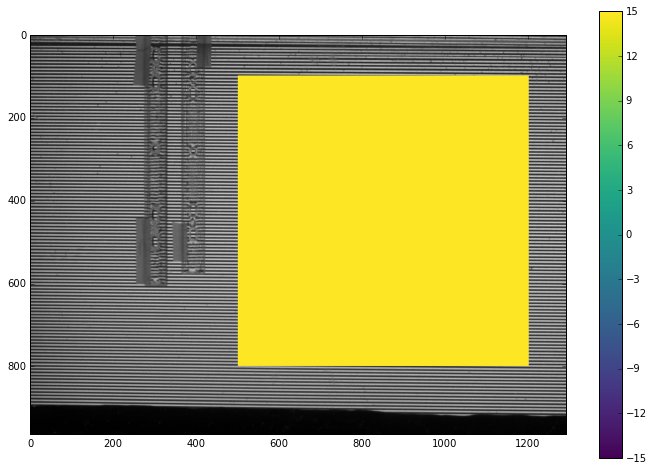

In [293]:
n0 = 750
xmin, xmax = 500, 1200
ymin, ymax = 100, 800

dz = schlieren(frames[0], frames[n0],
               sigma = 5,
               window = (slice(ymin, ymax), slice(xmin, xmax)),
              apply_mintol =True,
              apply_mean_filter = True,
              apply_gaussian_filter = True,)
              
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ref_image = io.imread(frames[0])
background = ax.imshow(ref_image,
             cmap=plt.get_cmap('gray'),
             clim = [0, 255],
             extent = (0, img.shape[1], img.shape[0], 0))

im = ax.imshow(dz,
             cmap=plt.get_cmap('viridis'),
             clim = [-0.05, 0.05],
             extent = (xmin, xmax, ymax, ymin))

#ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
title = ax.set_title('')
cb = fig.colorbar(m)

numframes = 100

pbar = tqdm_notebook(total=numframes, desc='Rendering', leave=True)

# animation function. This is called sequentially
def animate(i):
    n = n0 + 5*i
    title.set_text('{} (n={})'.format(frames.index[n].strftime('%H:%M:%S'), n) )
    
    dz = schlieren(frames[0], frames[n],
                   sigma = 5,
                   window = (slice(ymin, ymax), slice(xmin, xmax)),
                   apply_mintol = True,
                   apply_mean_filter = True,
                   apply_gaussian_filter = True,)
    
    im.set_array(dz)
    pbar.update()

    
    return (im,title)

# initialization function: plot the background of each frame
def init():
    im.set_array(ref_img)
    return (background,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=numframes, interval=300, blit=True)
_ = anim.to_html5_video()

pbar.close()
plt.close(fig)

anim

In [285]:
im1 = io.imread(frames[0])
im2 = io.imread(frames[750])

compute_deltaz(im1, im2)

array([[ 0.        , -0.03038298, -0.01111111, ...,  0.1524049 ,
         0.19335082,  0.1762726 ],
       [-0.17277613, -0.15175375, -0.09186352, ..., -0.0261578 ,
        -0.00855763,  0.        ],
       [-0.18012422, -0.06565657,  0.07949126, ..., -0.04017857,
        -0.02262444, -0.03296704],
       ..., 
       [-0.01485749,  0.        , -0.09275363, ..., -0.08208955,
        -0.05230769, -0.05650506],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [286]:
ts = frames.index[1]
ts.strftime('%H:%M:%S')

'15:42:10'

In [287]:
from tqdm import tnrange, tqdm_notebook
from time import sleep

for i in tnrange(10, desc='1st loop'):
    for j in tqdm_notebook(range(100), desc='2nd loop'):
        sleep(0.01)
    

In [288]:
anim

OSError: [Errno 12] Cannot allocate memory

In [ ]:
def compute_dz(video_id, 
               min_tol, 
               sigma, 
               filter_size,
               skip_frames=1,
               skip_row=1,
               skip_col=1,
               startF=0,stopF=None,diff_frames=1,cache=True):
    """
    Given video_id, calculate the dz array. Output is cached on disk.
    > returns the array dz
    > skip_frames is the number of frames to jump before computing dz

    Returns dz_id
    """
    db = labdb.LabDB()

    # get the number of frames if stopF is unspecified
    if (stopF is None):
        sql = """ SELECT num_frames FROM video WHERE video_id = %d""" % video_id 
        rows = db.execute(sql)
        stopF = rows[0][0]
        print(("stop_frames = ", stopF))
    num_frames=stopF-startF
    print(("num_frames:" ,num_frames))

    # Create the dz nc file to write data to
    dz_filename,dz_id,dt,dz,dx,chunkshape = create_nc_file(video_id,skip_frames,skip_row,skip_col,min_tol,\
            sigma,filter_size,startF,stopF,diff_frames,dz_id = dz_id)

    # Create a temporary dz file.
    temp_dz_filename = create_temp_nc_file(dz_filename)

    # count: start from the second frame. count is the variable that tracks the
    # current frame
    if diff_frames is None:
        count = startF
    else:
        count=startF+diff_frames

    # Set path to the two images
    path = "/Volumes/HD3/video_data/%d/frame%05d.png"

    hostname = socket.gethostname()
    cpu_count = multiprocessing.cpu_count()
    if hostname == 'taylor.physics.mun.ca':
        PROCESSES = cpu_count
    else:
        PROCESSES = cpu_count / 2
    PROCESSES = 8

    # Create pool
    pool = multiprocessing.Pool(PROCESSES)

    p = {}
    p['filename1'] = None
    p['filename2'] = None
    p['skip_row'] = skip_row
    p['skip_col'] = skip_col
    p['filter_size'] = filter_size
    p['min_tol'] = min_tol
    p['dz'] = dz
    p['sigma'] = sigma
    Ls = 13.5 # distance from front of screen to back of tank
    Lb = 0.9 # thickness of barrier
    Ld = 14.9 # width of rear channel
    Lp = 2.4 # thickness of back and front walls
    Lw = 29.5 # width of experimental region of tank
    # index of refraction
    na = 1.00
    np = 1.49
    nb = 1.49
    nw = 1.33
    gamma = 0.0001878 # See eqn 2.8 in Sutherland1999

    # const2 = -1.0/(gamma*((0.5*L_tank*L_tank)+(L_tank*win_l*n_water)))
    # Has been recalculated for our experiment
    dN2dz = (-1.0/(Lw*gamma)) * (1.0/(0.5*Lw+nw/nb*Lb+Ld+nw/nb * Lp + nw/na *Ls))

    # if diff_frames is given, we are computing dN2dt
    if diff_frames is not None:
        dN2dz = dN2dz / (dt*diff_frames)

    logger.debug('dN2dz = {:f}'.format(dN2dz))

    # progress bar
    widgets = [progressbar.Percentage(), ' ', progressbar.Bar(), ' ', progressbar.ETA()]
    pbar = progressbar.ProgressBar(widgets=widgets)
    
    # multiprocessing the task of writing data into nc file
    lock = multiprocessing.Lock()
    def cb(r):
        with lock:
            i, dz = r
            pbar.update(i)

            nc = netCDF4.Dataset(temp_dz_filename, 'a')
            temp_dz = nc.variables['temp_dz_array']
            temp_dz[i, :, :] = dN2dz * dz
            nc.close()

    tasks = []
    #counter for the while loop
    i = 0

    # submit tasks to perform in the while loop and this is in parallel
    while count < stopF:
        if diff_frames is not None:
            ref_frame = count - diff_frames
        else:
            ref_frame = startF

        filename1 = path % (video_id, ref_frame)
        filename2 = path % (video_id, count)

        if not os.path.exists(filename2):
            logger.info('%s not found but expected' % filename2)
            break

        # add filename1, filename2 to list of tasks
        p['filename1'] = filename1
        p['filename2'] = filename2
        p['i'] = i
        #tasks.append( (schlieren_lines, (dict(p),)))

        count += skip_frames

        pool.apply_async(schlieren_lines, (dict(p),), callback=cb)
        i += 1

    if i == 0:
        raise Exception('No pairs of image files found')


    # submit all tasks to worker pool
    pbar.maxval = i 
        
    logger.debug('Schlieren - frame by frame')
    pbar.start()
            
    # wait for all schlieren task to complete
    pool.close()
    pool.join()
                    
    pbar.finish()   
                        
    # open the temporary nc file to put in the time axis
    nc=netCDF4.Dataset(temp_dz_filename,'a')
    temp_dz = nc.variables['temp_dz_array']
                                
    nc.close()                      
                                        
    # The last Step of Synthetic Schlieren... Uniform filtering in time
    # open the temp dz nc file              
    nc = netCDF4.Dataset(temp_dz_filename, 'r')                     
    temp_dz_array = nc.variables['temp_dz_array']                                   
    T = nc.variables['time'][:]       
    
    # open the dz nc file for writing in the data
    dz_nc = netCDF4.Dataset(dz_filename, 'a')
    DZarray = dz_nc.variables['dz_array']
    ZZ = dz_nc.variables['row'][:]
    CC = dz_nc.variables['column'][:]
    TT = dz_nc.variables['time']
    #set the time axis for the dz array.
    TT[:] = T[:]

    t_chunk,r_chunk,c_chunk = chunkshape

    print(("chunk t,z,x :", t_chunk,r_chunk,c_chunk))

    print(("CC size, zz size" , CC.size, ZZ.size))
    col_count= CC.size-1
    row_count= ZZ.size-1

    # step 12 of Schlieren :: apply uniform filter in the time axis with the filter size of 6 (about
    # 1second). This should smoothen the dz along time.

    logger.debug('Schlieren - chunk by chunk')
    # (i, j) should index the ith and jth chunk
    logger.debug('size = {}'.format(temp_dz_array.shape))
    logger.debug('chunkshape = {}'.format(chunkshape) )
    nt, nz, nx = temp_dz_array.shape
    chunk_nt, chunk_nz, chunk_nx = chunkshape

    chunk_nz = chunk_nz * 2
    #chunk_nx = chunk_nx * 8
    
    widgets = [progressbar.Percentage(), ' ', progressbar.Bar(), ' ', progressbar.ETA()]
    pbar = progressbar.ProgressBar(widgets=widgets,
            maxval= (nz // chunk_nz)).start()

    for j in range(nz // chunk_nz):

        pbar.update(j)
        temp = temp_dz_array[:,
                  j*chunk_nz:(j+1)*chunk_nz,
                  :]

        # TODO: why (6, 1, 1)?
        temp_filt = ndimage.uniform_filter(temp,size = (18,1,1))

        DZarray[:,
                j*chunk_nz:(j+1)*chunk_nz,
                :] = temp_filt

        #for i in range(nx // chunk_nx):
#
#            pbar.update(j * (nx//chunk_nx) + i)
#
#            temp = temp_dz_array[:, 
#                                 j*chunk_nz:(j+1)*chunk_nz,
#                                 i*chunk_nx:(i+1)*chunk_nx]
#
#            # TODO: why (6, 1, 1)?
#            temp_filt = ndimage.uniform_filter(temp,size = (6,1,1))
#
#            DZarray[:, 
#                    j*chunk_nz:(j+1)*chunk_nz,
#                    i*chunk_nx:(i+1)*chunk_nx] = temp_filt

    pbar.finish()

    dz_nc.calculation_complete = 1

    dz_nc.close()
    nc.close()

    # remove temp dz file
    os.unlink(temp_dz_filename)

    return dz_id

## Discussion

The density probe calibration can be automated.  The probe exhibits variations with time and that variation needs to be better understood.  

For purposes of lab analysis, we need to standardize the procedure to calibrating the probe and recording that calibration. The density profiling needs to be standardized: consistent filenames, automatic time stamping, no need for hand-editing.


## Conclusion